# Predicting Customer Churn

### Prediction of customer churn defines that customer with the intention of leaving us in the future. 

In [2]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# ABOUT DATASET

###  I am going to use a telecommunications customers data to predict the customer churn. That contains columns of

### 1.customerID: A unique identifier for each customer.
### 2.gender: The gender of the customer.
### 3.SeniorCitizen: A binary variable indicating whether the customer is a senior citizen (1) or not (0).
### 4.Partner: Indicates whether the customer has a partner (Yes) or not (No).
### 5.Dependents: Indicates whether the customer has dependents (Yes) or not (No).
### 6.tenure: The number of months the customer has been with the service provider.
### 7.PhoneService: Indicates whether the customer has a phone service (Yes) or not (No).
### 8.MultipleLines: Indicates whether the customer has multiple lines (Yes, No, or No phone service).
### 9.InternetService: The type of internet service the customer has (DSL, Fiber optic, No).
### 10.OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: Binary variables indicating whether the customer has these additional services.
### 11.StreamingTV, StreamingMovies: Indicates whether the customer has streaming TV or streaming movie services.
### 12.Contract: The type of contract the customer has (Month-to-month, One year, Two years).
### 13.PaperlessBilling: Indicates whether the customer uses paperless billing (Yes) or not (No).
### 14.PaymentMethod: The method the customer uses for payment.
### 15.MonthlyCharges: The amount charged to the customer on a monthly basis.
### 16.TotalCharges: The total amount charged to the customer over the entire tenure.
### 17.Churn: The target variable indicating whether the customer has churned (Yes) or not (No).

In [3]:
df = pd.read_csv('churn (1).csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# Finding missing values

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Thus, there is no missing value 

In [8]:
#statistics 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

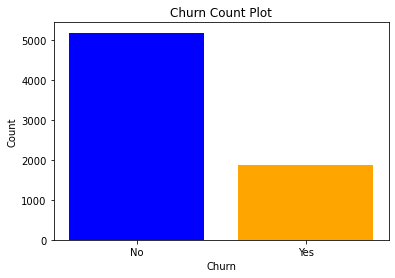

In [10]:
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values, color=['blue', 'orange'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Count Plot')
plt.show()


# percentage of churn 

In [12]:
numRetained = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]


# print the percentage of customers that stayed
print(numRetained/(numRetained + numChurned) * 100,'% of customers stayed in the company')
# peint the percentage of customers that left
print(numChurned/(numRetained + numChurned) * 100, '% of customers left with the company')

73.4630129206304 % of customers stayed in the company
26.536987079369588 % of customers left with the company


# Visualizing the churn count for both males and females 

<AxesSubplot:xlabel='gender', ylabel='count'>

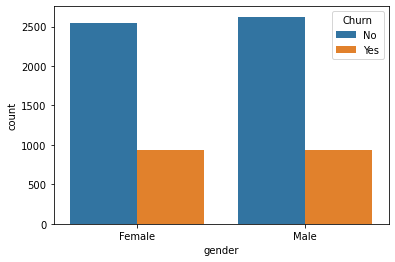

In [13]:
sns.countplot(x='gender',hue='Churn',data=df)

# Visualize the churn count for the internet service 

<AxesSubplot:xlabel='InternetService', ylabel='count'>

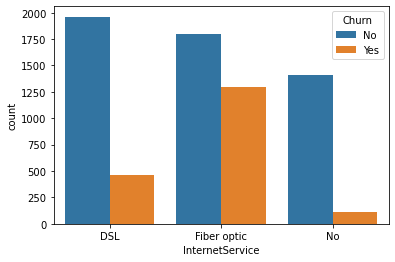

In [14]:
sns.countplot(x='InternetService',hue='Churn',data=df)

# To remove unnecessary columns

In [15]:
cleanDF = df.drop('customerID',axis=1)

In [16]:
print(cleanDF)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [17]:
cleanDF.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Convertion of all non numeric column to numeric

In [19]:
for i in cleanDF.columns:
    if cleanDF[i].dtype == np.number:
        continue
    cleanDF[i] = LabelEncoder().fit_transform(cleanDF[i])

C:\Users\mohammed rafik m\AppData\Local\Temp\ipykernel_16192\3541700076.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleanDF[i].dtype == np.number:


In [20]:
cleanDF.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [21]:
cleanDF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


# Scaling the data into features and Target

In [23]:
x = cleanDF.drop('Churn',axis=1)
y= cleanDF['Churn']
x= StandardScalar().fit_transform(x)

# splitting data into train and test

In [24]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Create and training of model

In [25]:
model = LogisticRegression()
model.fit(X_train,y_train)


C:\Users\mohammed rafik m\Downloads\New folder\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
prediction = model.predict(X_test)
print(prediction)

[1 0 0 ... 0 0 0]


# Checking the precision , recall and f1-score


In [31]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.8140525195173882


# Summary:
## Thus, the prediction of customer churn using the machine learning algorithm by building a predictive model has been successfully executed 